In [1]:
import torch
from torch.utils.tensorboard import SummaryWriter
from gmf import GMF
from mlp import MLP
from neumf import NeuMF

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [13]:
!ls checkpoints/

gmf_factor8-implict_Epoch0_HR0.1462_NDCG0.1470.model
mlp_factor8_bs256_reg_0.0000001_Epoch12_HR0.0622_NDCG0.0611.model
mlp_factor8_bs512_reg_1e-7_Epoch0_HR0.1674_NDCG0.1781.model
pretrain_neumf_factor16_Epoch12_HR0.1714_NDCG0.1851.model
w2v_neumf_title_Epoch0_HR0.0681_NDCG0.0622.model


In [3]:
writer = SummaryWriter(log_dir='runs/{}'.format('gmf_factor8-implict'))
gmf = GMF({'alias': 'gmf_factor8-implicit_2nd',
           'num_epoch': 200,
           'batch_size': 1024,
           'optimizer': 'adam',
           'adam_lr': 1e-3,
           'num_users': 42977,
           'num_items': 328050,
           'latent_dim': 8,
           'l2_regularization': 0.,
           'use_cuda': True,
           'device_id': 0,
           'model_dir': 'checkpoints/{}_Epoch{}_HR{:.4f}_NDCG{:.4f}.model'})

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [45]:
from torch.autograd import Variable
from torchviz import make_dot

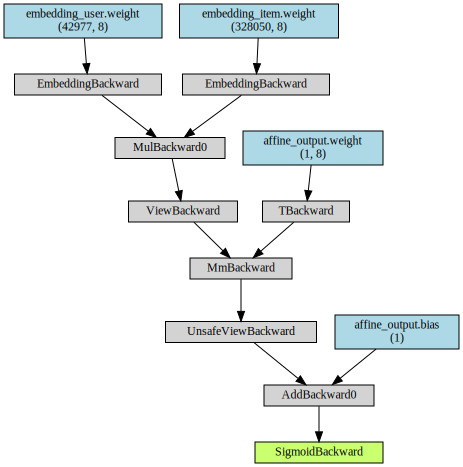

In [51]:
make_dot(gmf(Variable(torch.LongTensor([[1, 2]])), Variable(torch.LongTensor([[1, 2]]))), 
             dict(gmf.named_parameters()))

In [52]:
mlp = MLP({'alias': 'mlp_factor8_bs512_reg_1e-7',
              'num_epoch': 200,
              'batch_size': 512,  # 1024,
              'optimizer': 'adam',
              'adam_lr': 1e-3,
              'num_users': 42977,
              'num_items': 328050,
              'latent_dim': 8,
              'layers': [16, 64, 32, 16, 8],  # layers[0] is the concat of latent user vector & latent item vector
              'l2_regularization': 0.0000001,  # MLP model is sensitive to hyper params
              'use_cuda': True,
              'device_id': 0,
              'pretrain': False,
              'pretrain_mf': 'checkpoints/{}'.format('gmf_factor8-implicit_2nd_Epoch0_HR0.1412_NDCG0.1398.model'),
              'model_dir': 'checkpoints/{}_Epoch{}_HR{:.4f}_NDCG{:.4f}.model'})

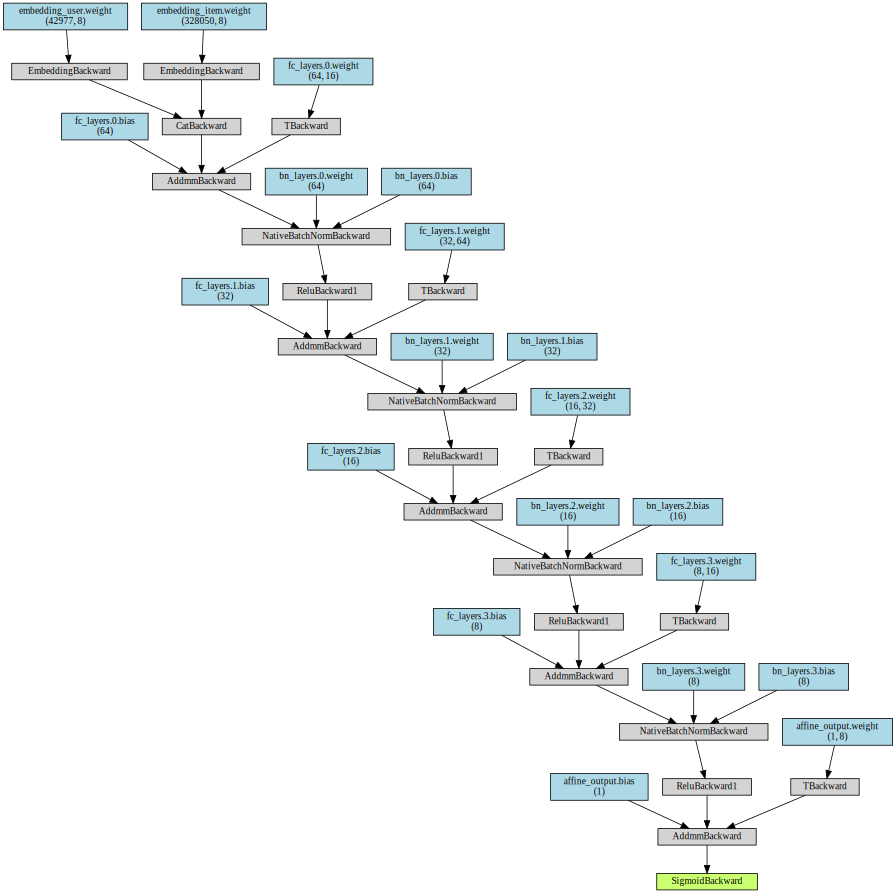

In [61]:
mlp.eval()
make_dot(mlp(torch.LongTensor([1, 2]), torch.LongTensor([1, 2])), 
             dict(mlp.named_parameters()))